
https://www.youtube.com/watch?v=BzcBsTou0C0&t=1s

# Neural Networks and Pytorch Introduction P.1:
- <mark>Fully connected</mark> network all parameters are connected to the next level
- Input->HiddenLv1->HiddenLv2->Output
- Input multiplied by weight then summed with all inputs with Sigma
- Sent to an <mark>"Activator"</mark> which decides whether to send signal (0, 1)
- 3 blue 1 brown Youtube

In [5]:
import torch

x = torch.Tensor([5, 3])
y = torch.Tensor([2, 1])

print(x * y)


tensor([10.,  3.])


In [6]:
x = torch.zeros([2, 5])
print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [7]:
x.shape

torch.Size([2, 5])

In [8]:
y = torch.rand([2, 5])
y

tensor([[0.0014, 0.7847, 0.1179, 0.9296, 0.0285],
        [0.6018, 0.9714, 0.8043, 0.2648, 0.4693]])

In [9]:
"""flatten element"""
y = y.view([1, 10])
y

tensor([[0.0014, 0.7847, 0.1179, 0.9296, 0.0285, 0.6018, 0.9714, 0.8043, 0.2648,
         0.4693]])


https://www.youtube.com/watch?v=i2yPxY2rOzs

# Data - Deep Learning and Neural networks with Python and Pytorch P.2:
- pip install torchvision
- neural networks solve vision tasks (tends to be with vision)
- torchvision has data
- out of sample data: data the machine hasn't touched/used before
- <mark>BATCH</mark>: how much data is fed through at a time (usually 8-64)
- people like base 8 for some reason
- <mark>BALANCING</mark>: if model can find shorter path to reduce loss, as optimzer reduces loss, it doesn't know how much it can reduce to; e.i might get STUCK.
    - thus make sure data is <mark>balanced</mark>: weights of specific classes are more equal
- <mark>LOSS</mark>: measured at output from neural network


In [10]:
import torch
import torchvision
from torchvision import transforms, datasets

In [11]:
"define two different datasets"
train = datasets.MNIST("", train=True, download=True,
                        transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True,
                        transform = transforms.Compose([transforms.ToTensor()]))

In [12]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [13]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [14]:
x, y = data[0][0], data[1][0]
print(y)

tensor(8)


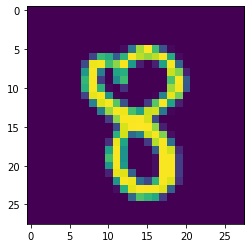

In [15]:
import matplotlib.pyplot as plt

#can't show as 1x28x28 so view in 28x28 correcting format to view it
plt.imshow(data[0][0].view(28, 28))
plt.show()

In [16]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [17]:
#looking at weight for each data class
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [18]:
#weight percentage of entire dataset: this looks pretty balanced
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


https://www.youtube.com/watch?v=ixathu7U-LQ

# Building our Neural Network-Deep Learning and Neural Networks with Python and Pytorch:

- Build and Train neural network
- <mark>Path</mark>: how data will flow through network
- <mark>Feed Forward Neural Network</mark>: data passes in one 
direction
- <mark>"F.relu()": Rectify Linear</mark> is an activation function and they ***SCALE DATA*** and they run on ***OUTPUT DATA***
- a <mark>"-1"x any dimension</mark> means that it might be any size and be prepared to deal with any 3-dimensional data
- You can add algorithms/logic to forward function to make complex models ***Special Part about Pytorch is that this is easy***
>Types of Activation Functions:
1. Stepper: 0 or 1
2. Stigmoid: between 0 and 1 inclusive

In [19]:
import torch.nn as nn 
import torch.nn.functional as F 

In [20]:
class Net(nn.Module):
    def __init__(self):
        #lets these variables to be inherited outside
        super().__init__() 

        #Define Our Layers
        #fully connected - 1 layer (2D/flat) - nn.Linear(input, output)
        self.fc1 = nn.Linear(28*28, 64)
        # takes the input of fc1 so 64 as input
        self.fc2 = nn.Linear(64, 64) 
        self.fc3 = nn.Linear(64, 64)
        # output 10 for 10 classes/neurons
        self.fc4 = nn.Linear(64, 10) 

    # Define path (feed forward) - act func runs on layer's output data
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        # We want a probability distribution for output
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [21]:
# lets pass some data through this neural network
x = torch.rand((28, 28))
x = x.view(-1, 28*28) # or x.view(1, 28*28)
output = net(x)
output

tensor([[-2.2145, -2.2980, -2.3318, -2.3866, -2.2778, -2.2708, -2.3074, -2.3766,
         -2.1890, -2.3956]], grad_fn=<LogSoftmaxBackward>)

https://www.youtube.com/watch?v=9j-_dOze4IM

# Training Model - Deep Learning and Neural Networks:
- **Two concepts**: Loss and Optimizer
- <mark>LOSS</mark>: how **wrong** is the model, goal to have loss decrease
- <mark>Optimizer</mark>: **adjust** weights based off loss, goal to lower loss
- <mark>learning rate</mark>: dictates size of the step or how fast model get's to desired point; tells us what weights to get us a loss of zero (mathematical)
    - **decaying learning rate**: start learning rate big then get's smaller so that it doesn't overstep/miss the goal point
- loss is calculated/based off output
- <mark>EPOCHS</mark>: unit of measurement for how many times we fully go through the data
**Output -> Loss -> Optimizer**
- Gradients contain your loss, telling you how wrong you are
- Loss is calculated: data that's 0 or 1 [use mean squared error], or scalar like this tutorial dataset
**GRADIENT??? still confused what**
- usually accuracy is never 90~% in real projects with large datasets

In [26]:
import torch.optim as optim

In [28]:
optimizer = optim.Adam(net.parameters(), lr=0.001) # lr = learning rate

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of featuresets and labels
        x, y = data # unpack data
        net.zero_grad() # zero the gradient
        output = net(x.view(-1, 28 * 28)) # dimension of picture (28 * 28)
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step() # adjust weights
    print(loss)

tensor(0.0984, grad_fn=<NllLossBackward>)
tensor(0.4483, grad_fn=<NllLossBackward>)
tensor(0.0037, grad_fn=<NllLossBackward>)


In [30]:
correct = 0
total = 0

# how many predictions actually matched targeted value
with torch.no_grad():
    for data in trainset:
        x, y = data
        output = net(x.view(-1, 28 * 28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.981


In [31]:
x

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

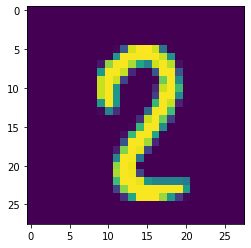

In [59]:
plt.imshow(x[7].view(28, 28))
plt.show()

In [58]:
print(torch.argmax(net(x[7].view(-1, 28 * 28))[0]))
# printing what our neural model predicts, let's see if it gets it correct:

tensor(2)


# Next file! We'll build our own convolutional neural network!